In [1]:
import imageio
import numpy as np
import scipy
from scipy.fftpack import dct
from scipy.signal import correlate
from math import floor

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style("whitegrid")
greys = sns.color_palette("Greys")
%matplotlib inline
import matplotlib.gridspec as gridspec

from utils import * 

### Compute the DCT of the blocks in each image

In [2]:
im1 = imageio.imread('../img/test1.png')
im2 = imageio.imread('../img/test2.png')
im3 = imageio.imread('../img/test3.png')

blocks1 = img_to_blocks(block_size, im1)
dct_blocks1 = dct2(blocks1)

blocks2 = img_to_blocks(block_size, im2)
dct_blocks2 = dct2(blocks2)

blocks3 = img_to_blocks(block_size, im3)
dct_blocks3 = dct2(blocks3)


In [10]:
def plt_hist(values, start=False, end=False):
    
    start = start if start else int(np.floor(values.min()))
    end = end if end else int(np.ceil(values.max()))
    
    bins=range(start, end, 1)
    g = sns.histplot(values, bins=bins, color='black')
    g.set(yticks=[], ylabel='', xticks=[])
    g.set_title('DCT Coefficient Histogram', fontsize=11, weight='bold')

    g.xaxis.grid(False, which='both')
    return g

def plt_hist_autocorr(values, bin_size=1):
    bins=range(
        int(np.floor(values.min())),
        int(np.ceil(values.max())),
        bin_size
    )

    hist,_ = np.histogram(values, bins=bins)
    autocorr = np.correlate(hist, hist, mode='full')
    g = sns.lineplot(data=autocorr[int(autocorr.size / 2):], color=greys[5])
    g.set(yticks=[], xticks=[], title='Autocorrelation of DCT Coefficient Histogram')
    return g
    
def plt_hist_fft(values, bin_size=1):
    bins=range(
        int(np.floor(values.min())),
        int(np.ceil(values.max())),
        bin_size
    )

    hist,_ = np.histogram(values, bins=bins)

    H = np.fft.fft(hist)
    H = np.roll(H,int(H.size/2))
    x = [i - int(H.size / 2)  for i in range(H.size)]
    g = sns.lineplot(data=np.abs(H), color=greys[5])
    g.set(yticks=[],  xticks=[], title='FFT of DCT Coefficient Histogram')
    return g

In [15]:
def make_dct_coef_plot(imdctblocks, i, j, fname=''):
    
    fig = plt.figure(figsize=(10, 11))
    outer = gridspec.GridSpec(3, 1, height_ratios = [1, 1, 1], hspace=.2)
    
    #Plot for image 1
    gs1 = gridspec.GridSpecFromSubplotSpec(ncols=10, nrows=4, subplot_spec = outer[0], hspace=.5)
    s1 = plt.subplot(gs1[0:3, 0:3])
    
    plt.imshow(imdctblocks[0][:,:,i,j], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'IM1: DCT Coefficients [{i},{j}]', fontsize=11, weight='bold')
    
    plt.subplot(gs1[0:2,3:])
    sub1 = plt_hist(imdctblocks[0][:,:,i,j].flatten())
    sub1.tick_params(pad=0)

    plt.subplot(gs1[2,3:])
    plt_hist_autocorr(imdctblocks[0][:,:,i,j].flatten())

    plt.subplot(gs1[3,3:])
    plt_hist_fft(imdctblocks[0][:,:,i,j].flatten())

    
    #Plot for image 2
    gs2 = gridspec.GridSpecFromSubplotSpec(ncols=10, nrows=4, subplot_spec = outer[1], hspace=.5)
    
    plt.subplot(gs2[0:3, 0:3])
    plt.imshow(imdctblocks[1][:,:,i,j], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'IM2: DCT Coefficients [{i},{j}]', fontsize=12, weight='bold')

    plt.subplot(gs2[0:2,3:])
    sub1 = plt_hist(imdctblocks[1][:,:,i,j].flatten())

    plt.subplot(gs2[2,3:])
    plt_hist_autocorr(imdctblocks[1][:,:,i,j].flatten())

    plt.subplot(gs2[3,3:])
    plt_hist_fft(imdctblocks[1][:,:,i,j].flatten())

    
    #Plot for image 3
    gs3 = gridspec.GridSpecFromSubplotSpec(ncols=10, nrows=4, subplot_spec = outer[2], hspace=.5)
        
    plt.subplot(gs3[0:3, 0:3])
    plt.imshow(imdctblocks[2][:,:,i,j], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'IM3: DCT Coefficients [{i},{j}]', fontsize=12, weight='bold')

    plt.subplot(gs3[0:2,3:])
    sub1 = plt_hist(imdctblocks[2][:,:,i,j].flatten())

    plt.subplot(gs3[2,3:])
    plt_hist_autocorr(imdctblocks[2][:,:,i,j].flatten())

    plt.subplot(gs3[3,3:])
    plt_hist_fft(imdctblocks[2][:,:,i,j].flatten())
        
    if fname:
        fig.savefig(fname, format='png', dpi=500) #Increase DPI for final plot

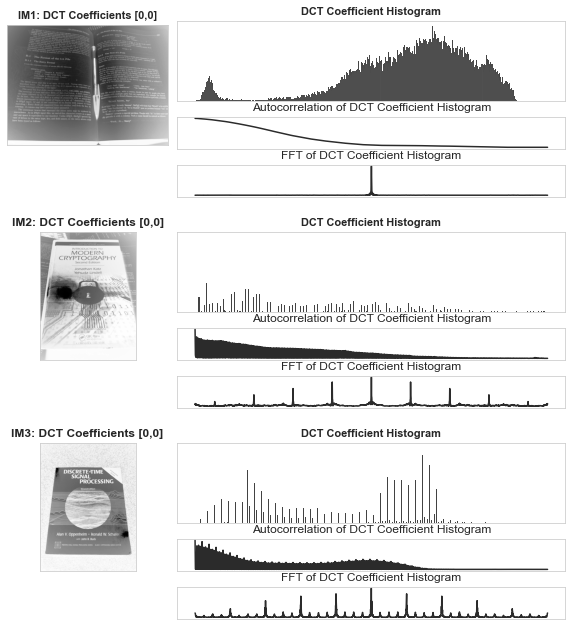

In [18]:
sns.set_context(font_scale = .8)
make_dct_coef_plot([dct_blocks1, dct_blocks2, dct_blocks3], 0, 0, 'Fig5a.png')

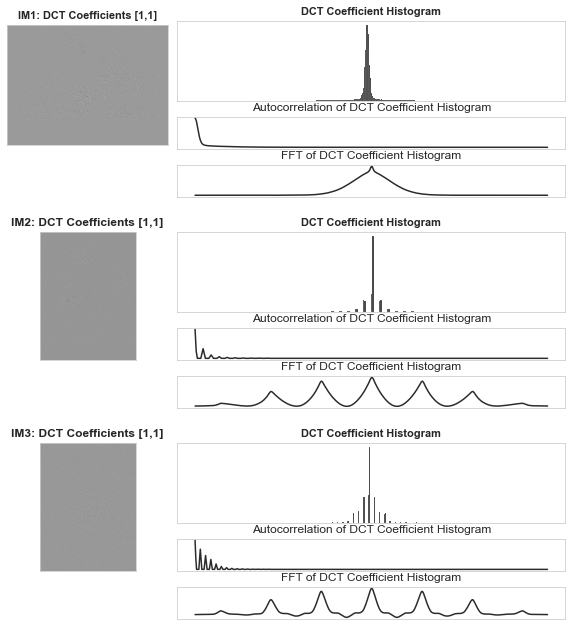

In [17]:
make_dct_coef_plot([dct_blocks1, dct_blocks2, dct_blocks3], 1, 1, 'Fig5b.png')